In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, accuracy_score,plot_confusion_matrix

In [ ]:
test = pd.read_csv("fashion-mnist_test.csv")
train  = pd.read_csv("fashion-mnist_train.csv")
train.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,...,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,0,0,105,92,101,107,100,132,0,0,2,4,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,150,...,211,220,214,74,0,255,222,128,0,0,0,0,0,0,0,0,0,44,12,0,0,40,134,162,191,214,163,146,165,79,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,0,114,183,112,55,23,72,102,165,160,28,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,24,188,163,93,...,171,249,207,197,202,45,0,3,0,0,0,0,0,0,0,0,0,0,1,0,0,0,22,21,25,69,52,45,74,39,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,0,0,0,46,0,21,68,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,25,187,189,...,230,237,229,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,68,116,112,136,147,144,121,102,63,0,0,0,0,0,0,0,0,0,0


1. Plot 16 random samples from the training set with the corresponding labels.

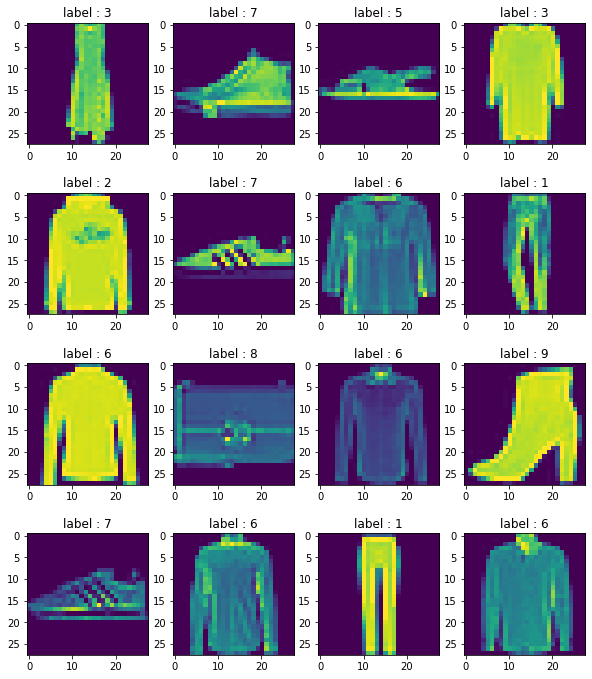

In [ ]:
data = train.sample(n=16)
plt.figure(figsize=(10,12))
for i in range(16):
    image = np.array(data.iloc[i][1:]).reshape((28,28))
    plt.subplot(4,4,i+1)
    plt.imshow(image)
    plt.title('label : '+str(data.iloc[i][0]))
plt.show()

2. Train a multilayer perceptron to achieve as good accuracy as you can. There are numerous hyperparameters
that we discussed in class which you can tweak, for instance: learning rate, number of and
size of hidden layers, activation function and regularization (e.g. Ridge (known here as L2), and early
stopping). You should make a structured search for the best hyperparameters that you can find.

In [ ]:
mlp = MLPClassifier(max_iter=100)
parameter_space = {
    'hidden_layer_sizes': [(100,),(100,50),(100,100),(50,50,20)],
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.05],
    'learning_rate': ['constant','adaptive'],
}

clf = GridSearchCV(mlp, parameter_space, n_jobs=-1, cv=3)
clf.fit(train.drop('label', axis=1), train['label'])

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


GridSearchCV(cv=3, error_score=nan,
             estimator=MLPClassifier(activation='relu', alpha=0.0001,
                                     batch_size='auto', beta_1=0.9,
                                     beta_2=0.999, early_stopping=False,
                                     epsilon=1e-08, hidden_layer_sizes=(100,),
                                     learning_rate='constant',
                                     learning_rate_init=0.001, max_fun=15000,
                                     max_iter=100, momentum=0.9,
                                     n_iter_no_change=10,
                                     nesterovs_momentum=True, power_t=0.5,
                                     random_state...
                                     validation_fraction=0.1, verbose=False,
                                     warm_start=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'activation': ['tanh', 'relu'],
                         'alpha': [0.0001, 0.05],


In [ ]:
print('Best Hyperparameters found:\n', clf.best_params_)

Best Hyperparameters found:
 {'activation': 'relu', 'alpha': 0.0001, 'hidden_layer_sizes': (100, 50), 'learning_rate': 'adaptive', 'solver': 'adam'}


In [ ]:
y_pred_test = clf.predict(test.drop('label', axis=1))
y_pred_train = clf.predict(train.drop('label', axis=1))
print("Training accuracy : ", accuracy_score(train['label'],y_pred_train))
print("Test accuracy : ", accuracy_score(test['label'],y_pred_test))

Training accuracy :  0.9307
Test accuracy :  0.8782


3. Plot the confusion matrix. Which are the easy/hard categories to classify? Are there any particular
classes that often gets mixed together?

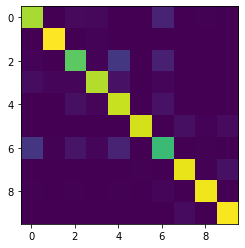

[[852   3  23  20   3   0  94   0   5   0]
 [  3 979   2  11   2   0   3   0   0   0]
 [ 10   1 731  11 159   0  87   0   1   0]
 [ 34  12  18 868  47   1  18   0   2   0]
 [  0   1  41  13 895   0  49   0   1   0]
 [  0   0   0   1   1 917   1  42   8  30]
 [154   5  54  17  94   0 669   0   7   0]
 [  0   0   0   0   0   6   0 946   4  44]
 [  5   1   6   3   7   1  17   3 957   0]
 [  0   0   0   0   1   2   0  27   2 968]]


In [ ]:
plt.imshow(confusion_matrix(test['label'], y_pred_test))
plt.show()
print(confusion_matrix(test['label'], y_pred_test))

As we can see the diagonal elements are high indicating correct classificatins. but few prominent misclassifiactions.for example,as we can see in the C[6,0]=154 indicating most of the 6th degree items(shirt) are misclassified as 0th category(T-shirt or top).
Another similar example is C[2,4] where most of the second category pullover are misclassified as 4th category(coat).
Few more examples are confusion between(coat and shirt),(shirt and pullover),(sandals and sneakers),(sneakers and ankle boots) etc.This confusion is predictible.